In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [3]:
df=pd.read_csv("BMI.csv")
df

,BMI,BodyFatPercentage
0,21.490142,29.308678
1,21.943066,37.615149
2,19.297540,28.829315
3,24.737638,33.837174
4,18.591577,32.712800
...,...,...
995,68.823474,95.604714
996,24.056942,10.926421
997,102.475436,43.914982
998,101.636263,89.309021


In [4]:
X=df

In [5]:
scalar=StandardScaler()
x_scalar=scalar.fit_transform(X)
x_scalar

array([[-1.18680587, -0.5031723 ],
       [-1.17300751, -0.14741339],
       [-1.25360379, -0.52370302],
       ...,
       [ 1.28042137,  0.12240294],
       [ 1.25485585,  2.06659009],
       [-1.61317237,  2.02536516]], shape=(1000, 2))

In [8]:
model=DBSCAN(eps=0.5,min_samples=10)
label=model.fit_predict(x_scalar)
label


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

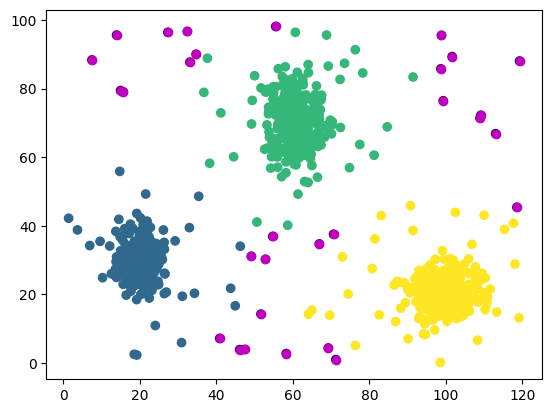

In [9]:
plt.scatter(X["BMI"],X["BodyFatPercentage"],c=label)
outlier=X[label==-1]
plt.scatter(outlier["BMI"],outlier["BodyFatPercentage"],color="m")
plt.show()

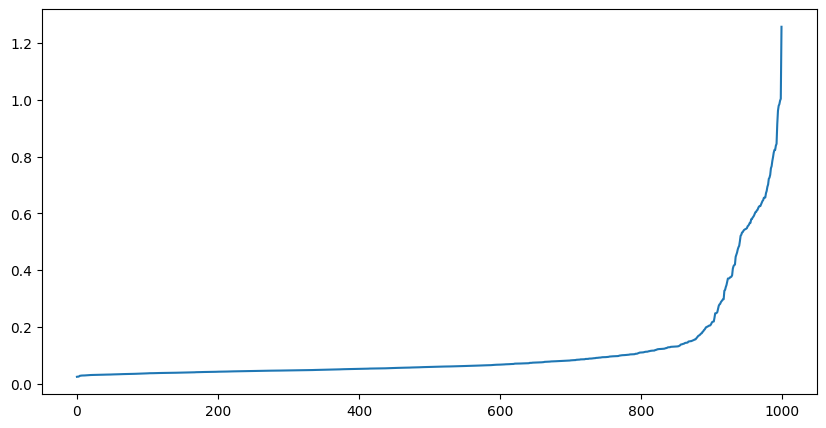

In [10]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
neighbour=NearestNeighbors(n_neighbors=10)
neighbour_fit=neighbour.fit(x_scalar)
distances,indices=neighbour_fit.kneighbors(x_scalar)
distances=np.sort(distances[:,9])
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.show()